In [1]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [2]:
games_csv = pd.read_csv('../data/chess_games.csv')

In [4]:
#Select one million random rows 
def select_random_rows(data, num_rows):
    np.random.seed(42)
    games_ix = np.random.choice(data.index, num_rows, replace=False)
    games_sample = data.loc[games_ix]
    return games_sample

In [5]:
games = select_random_rows(games_csv, 10000)
games.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
2660359,Blitz tournament,antonin32,TheMasterClass,1-0,2016.07.14,08:39:44,1657,1475,6.0,-8.0,C00,Rat Defense: Small Center Defense,180+0,Normal,1. e4 d6 2. d4 e6 3. Nf3 Qh4 4. g3 Qxe4+ 5. Qe...
1819694,Blitz,MACFLAIR,Rodrigo_Inacio,0-1,2016.07.10,02:27:48,1516,1592,-9.0,9.0,A01,Nimzo-Larsen Attack: Modern Variation #4,300+0,Normal,1. b3 e5 2. Bb2 Nc6 3. e3 d5 4. Bb5 Bd7 5. Bxc...
1872102,Blitz,dflbv50,RompoOrtosYDefensas,0-1,2016.07.10,11:10:48,2045,1980,-12.0,12.0,C00,Rat Defense: Small Center Defense,180+0,Normal,1. e4 d6 2. d4 e6 3. c4 f6 4. Nc3 g6 5. Nf3 Bg...
2404217,Classical,yjunior5000,Syas,1-0,2016.07.12,22:58:08,1724,1863,16.0,-14.0,A50,Slav Indian,420+8,Normal,1. c4 Nf6 2. d4 c6 3. Nc3 d5 4. c5 Bf5 5. Nf3 ...
3159773,Bullet,mrzlopolis2,munizbc,0-1,2016.07.16,19:30:03,1894,2014,-7.0,8.0,B10,Caro-Kann Defense: Breyer Variation,30+0,Time forfeit,1. e4 c6 2. d3 d5 3. Be2 dxe4 4. dxe4 Qxd1+ 5....


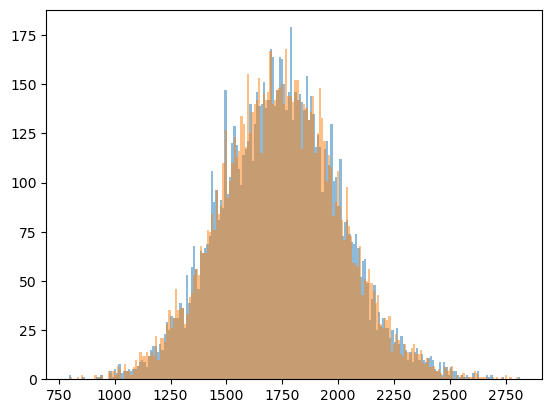

In [6]:
hide = plt.hist(games['WhiteElo'], bins=200, alpha=0.5, label='WhiteElo')
hide = plt.hist(games['BlackElo'], bins=200, alpha=0.5, label='WhiteElo')

In [7]:
games[['WhiteElo', 'BlackElo']].describe()

,WhiteElo,BlackElo
count,10000.000000,10000.00000
mean,1744.923200,1742.56880
std,266.123515,266.84019
min,795.000000,799.00000
25%,1559.000000,1562.00000
50%,1743.000000,1741.00000
75%,1921.000000,1920.00000
max,2814.000000,2808.00000


In [8]:
# Correlations

c_matrix = np.corrcoef(games['WhiteElo'], games['BlackElo'])
c_matrix

array([[1.        , 0.71334673],
       [0.71334673, 1.        ]])

In [9]:
game = games[:10]['AN'].iloc[6]
game.split('[%eval]')

# Arbitrary decimal number, dot, the space.

['1. b3 { [%eval -0.19] } 1... c5 { [%eval 0.2] } 2. Bb2 { [%eval 0.01] } 2... Nc6 { [%eval 0.07] } 3. d3 { [%eval -0.32] } 3... Nf6 { [%eval -0.1] } 4. e4 { [%eval -0.1] } 4... e6 { [%eval -0.06] } 5. f4 { [%eval -0.49] } 5... d5 { [%eval -0.42] } 6. Bxf6? { [%eval -1.96] } 6... Qxf6 { [%eval -2.05] } 7. e5? { [%eval -3.21] } 7... Qh6? { [%eval -1.5] } 8. Qd2 { [%eval -1.44] } 8... Nd4?! { [%eval -0.55] } 9. Nf3? { [%eval -1.8] } 9... Nxf3+ { [%eval -1.69] } 10. gxf3 { [%eval -1.69] } 10... Be7 { [%eval -1.64] } 11. Be2? { [%eval -2.67] } 11... Bh4+ { [%eval -2.59] } 12. Kd1 { [%eval -2.48] } 12... Qg6?! { [%eval -1.69] } 13. Nc3 { [%eval -1.86] } 13... b6?! { [%eval -1.28] } 14. Nb5 { [%eval -1.25] } 14... Ba6?? { [%eval 2.09] } 15. Nc7+ { [%eval 1.97] } 15... Kd7?! { [%eval 2.87] } 16. Nxa8? { [%eval 0.76] } 16... Rxa8 { [%eval 0.85] } 17. Rg1?? { [%eval #-3] } 17... Qf5?? { [%eval 2.09] } 18. Rxg7 { [%eval 2.03] } 18... Be7 { [%eval 2.15] } 19. Bf1 { [%eval 2.11] } 19... c4? { [%ev

In [14]:
len(re.findall('[\d]+\. ', game))

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nicks\AppData\Local\Temp\ipykernel_2340\362515058.py:1: SyntaxWarning: invalid escape sequence '\d'
  len(re.findall('[\d]+\. ', game))


30

In [15]:
def get_game_length(game):
    return len(re.findall('[\d]+\. ', game)) #len(game.split('.')) - 1

games['Length'] = games['AN'].apply(get_game_length)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nicks\AppData\Local\Temp\ipykernel_2340\788028938.py:2: SyntaxWarning: invalid escape sequence '\d'
  return len(re.findall('[\d]+\. ', game)) #len(game.split('.')) - 1


In [16]:
games['Length'].describe()

count    10000.000000
mean        33.890700
std         15.533289
min          1.000000
25%         23.000000
50%         32.000000
75%         43.000000
max        123.000000
Name: Length, dtype: float64

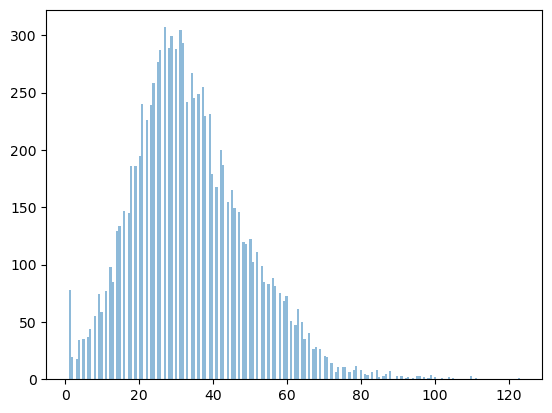

In [17]:
# Hist for game length
hide = plt.hist(games['Length'], bins=200, alpha=0.5, label='Length')

In [18]:
def flatten(xss):
    flat_list = [
    x
    for xs in xss
    for x in xs
]
    return flat_list

def get_moves(game_string):
    '''Take in a game as AN, convert into list of moves. Works on dirty rows, with {%eval}, too.
    
    Ex: "1. e4 e6 2. d4 d5 3. e5 c5" -> ['e4', 'e6', 'd4', 'd5', 'e5', 'c5']'''
    moves_double = re.split(r'[\d]+\. ', game_string)
    has_eval = len(re.findall(r'\[%eval.+\]', game_string)) > 0
    
    outcomes = ['0-1', '1-0', '1/2-1/2']

    # Handle "dirty" games with {eval} annotations 
    if has_eval:
        # print('has eval')
        moves_single_dirty = [[m.strip() for m in re.split(r'[\d]+\.\.+', md)] for md in moves_double[1:]]
        moves_single_dirty = flatten(moves_single_dirty)
        moves_single = [re.sub(r'\{.+\}', '', ms).strip() for ms in moves_single_dirty]
        
        for outcome in outcomes:
            if outcome in moves_single[-1]:
                moves_single[-1] = moves_single[-1].split(outcome)[0].strip()
                break
            
    # Handle "clean" games without {eval} annotations 
    else:
        moves_single = flatten([md.strip().split(' ') for md in moves_double[1:]])
        
        if moves_single[-1] in outcomes:
            moves_single = moves_single[:-1]
            
    # Remove ?!+ characters
    moves_single = [re.sub(r'[?!+]', '', ms) for ms in moves_single]
        
    return moves_single

In [19]:
game = games[:10]['AN'].iloc[5]
eval_game = games[:10]['AN'].iloc[6]

In [32]:
def add_move_features(data, n):
    '''
    INPUTS:
    DATA is a df. 
    N is the number of rounds (a single move counts as both white moving + black moving). 
    
    OUTPUT:
    Return copy of DATA with an additional 3*2*N new columns. Every column is read as a move for exactly one side.
    
    "sw1" means white's first move square, 
    "sb1" means black's first move square. 
    "pw1" means white's first move piece, 
    "pb1" means black's first move piece. 
    "cw1" is boolean if white's first move had a capture, 
    "cb1" is boolean if black's first move had a capture. 
    
    
    '''
    
    data = data.copy()
    data['moves'] = data['AN'].apply(get_moves)
    
    max_single_moves = data['moves'].apply(lambda l: len(list(l))).max()
    num_columns = min(2*n, max_single_moves)
    
    ### MAKE ALL LIST LENGTHS THE SAME ###
    empty_move = ''
    data['moves'] = data['moves'].apply(lambda l: l + [empty_move]*(num_columns - len(l)))
    data['moves'] = data['moves'].apply(lambda l: l[:num_columns])
    
    
    ### GET ONLY THE SQUARES ###
    def get_square_value(x):
        
        promotions = ['=Q', '=N', '=B', '=R']
        
        if '*' in x:
            x = x.strip('*')
        
        # For not castles
        if 'O-O' not in x:
            x = x.strip('#')
            for promotion in promotions:
                x = x.strip(promotion)
            return x[-2:]
        
        # For castles
        elif 'O-O' in x:
            x = x.strip('#')
            return x
        
        else:
            return ''
    
    ### GET ONLY THE PIECE MOVED ###
    def get_piece(x):
        
        promotions = ['=Q', '=N', '=B', '=R']
        
        if '*' in x:
            x = x.strip('*')
        
        # For not castles
        if 'O-O' not in x:
            for promotion in promotions:
                if promotion in x:
                    return promotion.strip('=')
                
            pieces = ['R', 'N', 'B', 'Q', 'K']
            for piece in pieces:
                if piece in x:
                    return piece
            return 'P'
        
        # For castles
        elif 'O-O' in x:
            return 'K'
        
        else:
            return ''
        
    ### GET IF A MOVE WAS A CAPTURE ###
    def get_capture(x):
        return 'x' in x
        
    data['squares'] = data['moves'].apply(lambda l: [get_square_value(x) for x in l])
    data['pieces'] = data['moves'].apply(lambda l: [get_piece(x) for x in l])
    data['captures'] = data['moves'].apply(lambda l: [get_capture(x) for x in l])
    

    
    ### SEPERATE INTO COLUMNS ###
    cols = []
    for i in range(num_columns):
        
        move_num = i//2 + 1
        
        if i%2 == 0:
            cols.append((data['squares'].apply(lambda l: l[i])).rename(f'sw{move_num}')) # Add white move square
            cols.append((data['pieces'].apply(lambda l: l[i])).rename(f'pw{move_num}').astype('category')) # Add white move piece
            cols.append((data['captures'].apply(lambda l: l[i])).rename(f'cw{move_num}')) # Add white move capture boolean
            
        if i%2 == 1:
            cols.append((data['squares'].apply(lambda l: l[i])).rename(f'sb{move_num}')) # Add black move square
            cols.append((data['pieces'].apply(lambda l: l[i])).rename(f'pb{move_num}').astype('category')) # Add black move piece
            cols.append((data['captures'].apply(lambda l: l[i])).rename(f'cb{move_num}')) # Add black move capture boolean
        
    return pd.concat([data] + cols, axis=1)


In [33]:
g = add_move_features(games, 10)
g

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,...,cw9,sb9,pb9,cb9,sw10,pw10,cw10,sb10,pb10,cb10
2660359,Blitz tournament,antonin32,TheMasterClass,1-0,2016.07.14,08:39:44,1657,1475,6.0,-8.0,...,False,b4,B,False,c3,P,False,a5,B,False
1819694,Blitz,MACFLAIR,Rodrigo_Inacio,0-1,2016.07.10,02:27:48,1516,1592,-9.0,9.0,...,False,f3,B,True,f3,N,True,e7,Q,False
1872102,Blitz,dflbv50,RompoOrtosYDefensas,0-1,2016.07.10,11:10:48,2045,1980,-12.0,12.0,...,True,d5,P,True,h6,B,False,e4,P,True
2404217,Classical,yjunior5000,Syas,1-0,2016.07.12,22:58:08,1724,1863,16.0,-14.0,...,True,f6,B,True,O-O,K,False,d7,N,False
3159773,Bullet,mrzlopolis2,munizbc,0-1,2016.07.16,19:30:03,1894,2014,-7.0,8.0,...,False,c5,B,False,a5,B,False,c8,R,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093481,Blitz,Vlados1k,raponchi,1-0,2016.07.26,10:25:14,1737,1669,8.0,-9.0,...,False,a6,P,False,e3,P,False,b4,Q,False
2302564,Blitz,reza_danger,esibest,1-0,2016.07.12,14:52:46,2015,1813,5.0,-6.0,...,False,e7,N,False,h4,P,False,f5,P,False
1643501,Bullet,caissaa,Yamilcis,1/2-1/2,2016.07.09,06:41:29,1998,2057,2.0,-2.0,...,False,e8,R,False,O-O,K,False,f8,N,False
1663847,Classical,lawr34,Homem-Conan,1-0,2016.07.09,09:50:30,1923,1933,11.0,-11.0,...,False,e6,P,False,g3,N,False,d5,P,False


In [34]:
def clean_event_col(df):
    '''Input df, outputs a df with OHE Event columns.'''
    
    df = df.copy()
    df['Event'] = df['Event'].apply(lambda x: x.lower().strip().split(' ')[0])
    
    ## NOTE: removes correspondence games
    dummy_cols = pd.get_dummies(df['Event'])
    df = pd.concat([dummy_cols, df], axis=1)
    df = df.drop(columns=['Event'])
    
    return df

In [35]:
# ## Problem Game: 4796249
# prob_game = games.loc[4796249]['AN']

In [36]:
clean_event_col(g)

,blitz,bullet,classical,correspondence,White,Black,Result,UTCDate,UTCTime,WhiteElo,...,cw9,sb9,pb9,cb9,sw10,pw10,cw10,sb10,pb10,cb10
2660359,True,False,False,False,antonin32,TheMasterClass,1-0,2016.07.14,08:39:44,1657,...,False,b4,B,False,c3,P,False,a5,B,False
1819694,True,False,False,False,MACFLAIR,Rodrigo_Inacio,0-1,2016.07.10,02:27:48,1516,...,False,f3,B,True,f3,N,True,e7,Q,False
1872102,True,False,False,False,dflbv50,RompoOrtosYDefensas,0-1,2016.07.10,11:10:48,2045,...,True,d5,P,True,h6,B,False,e4,P,True
2404217,False,False,True,False,yjunior5000,Syas,1-0,2016.07.12,22:58:08,1724,...,True,f6,B,True,O-O,K,False,d7,N,False
3159773,False,True,False,False,mrzlopolis2,munizbc,0-1,2016.07.16,19:30:03,1894,...,False,c5,B,False,a5,B,False,c8,R,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093481,True,False,False,False,Vlados1k,raponchi,1-0,2016.07.26,10:25:14,1737,...,False,a6,P,False,e3,P,False,b4,Q,False
2302564,True,False,False,False,reza_danger,esibest,1-0,2016.07.12,14:52:46,2015,...,False,e7,N,False,h4,P,False,f5,P,False
1643501,False,True,False,False,caissaa,Yamilcis,1/2-1/2,2016.07.09,06:41:29,1998,...,False,e8,R,False,O-O,K,False,f8,N,False
1663847,False,False,True,False,lawr34,Homem-Conan,1-0,2016.07.09,09:50:30,1923,...,False,e6,P,False,g3,N,False,d5,P,False


In [37]:
white_chess_dict = {
    '': 0,
    'a1': 1,
    'a2': 2,
    'a3': 3,
    'a4': 4,
    'a5': 5,
    'a6': 6,
    'a7': 7,
    'a8': 8,
    'b1': 9,
    'b2': 10,
    'b3': 11,
    'b4': 12,
    'b5': 13,
    'b6': 14,
    'b7': 15,
    'b8': 16,
    'c1': 17,
    'c2': 18,
    'c3': 19,
    'c4': 20,
    'c5': 21,
    'c6': 22,
    'c7': 23,
    'c8': 24,
    'd1': 25,
    'd2': 26,
    'd3': 27,
    'd4': 28,
    'd5': 29,
    'd6': 30,
    'd7': 31,
    'd8': 32,
    'e1': 33,
    'e2': 34,
    'e3': 35,
    'e4': 36,
    'e5': 37,
    'e6': 38,
    'e7': 39,
    'e8': 40,
    'f1': 41,
    'f2': 42,
    'f3': 43,
    'f4': 44,
    'f5': 45,
    'f6': 46,
    'f7': 47,
    'f8': 48,
    'g1': 49,
    'g2': 50,
    'g3': 51,
    'g4': 52,
    'g5': 53,
    'g6': 54,
    'g7': 55,
    'g8': 56,
    'h1': 57,
    'h2': 58,
    'h3': 59,
    'h4': 60,
    'h5': 61,
    'h6': 62,
    'h7': 63,
    'h8': 64,
    'O-O': 49,
    'O-O-O': 17 
}

In [38]:
black_chess_dict = {
    '': 0,
    'a1': 1,
    'a2': 2,
    'a3': 3,
    'a4': 4,
    'a5': 5,
    'a6': 6,
    'a7': 7,
    'a8': 8,
    'b1': 9,
    'b2': 10,
    'b3': 11,
    'b4': 12,
    'b5': 13,
    'b6': 14,
    'b7': 15,
    'b8': 16,
    'c1': 17,
    'c2': 18,
    'c3': 19,
    'c4': 20,
    'c5': 21,
    'c6': 22,
    'c7': 23,
    'c8': 24,
    'd1': 25,
    'd2': 26,
    'd3': 27,
    'd4': 28,
    'd5': 29,
    'd6': 30,
    'd7': 31,
    'd8': 32,
    'e1': 33,
    'e2': 34,
    'e3': 35,
    'e4': 36,
    'e5': 37,
    'e6': 38,
    'e7': 39,
    'e8': 40,
    'f1': 41,
    'f2': 42,
    'f3': 43,
    'f4': 44,
    'f5': 45,
    'f6': 46,
    'f7': 47,
    'f8': 48,
    'g1': 49,
    'g2': 50,
    'g3': 51,
    'g4': 52,
    'g5': 53,
    'g6': 54,
    'g7': 55,
    'g8': 56,
    'h1': 57,
    'h2': 58,
    'h3': 59,
    'h4': 60,
    'h5': 61,
    'h6': 62,
    'h7': 63,
    'h8': 64,
    'O-O': 56,
    'O-O-O': 24 
}

In [39]:
# ASSUME CSV IS ALREADY READ IN
def main(n, num_rows = 10000):
    games = select_random_rows(games_csv, num_rows)
    
    # Remove correspondence
    games = clean_event_col(games)
    games = games[games['correspondence'] == False].drop(columns=['correspondence'])
    
    # Include only finished games
    games = games[games['Result'] != '*']
    
    # Add game length
    games['Length'] = games['AN'].apply(get_game_length)
    
    # Add move features (only gets squares)
    games = add_move_features(games, n)
    
    # Filter out games with less than n moves
    games = games[games['Length'] >= n]
    
    # Use dicts
    for col in games.columns[-(6*n):]:
        if 'sw' in col:
            games[col] = games[col].apply(lambda k: white_chess_dict[k]).astype('int32')
        if 'sb' in col:
            games[col] = games[col].apply(lambda k: black_chess_dict[k]).astype('int32')
    
    return games
    

In [40]:
# Event stuff
# White ELO, Black ELO
# Moves (n)

In [41]:
# Graphs:

# For each model type:
    # Does changing the number of moves considered change the TEST RMSE?
    # X axis: Number of moves
    # Y axis: RMSE
    
    # Does changing the min_number of moves change the TEST RMSE?
    # X axis: Number of moves
    # Y axis: RMSE
    
    # How does length change by ELO?
    # Line graph
    # X axis: ELO
    # Y axis: Length
    
    # How does length change by ELO (stratify by Event type)? Multicolor line graph
    # X axis: ELO
    # Y axis: Length

# [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

# TTS: 0.8/0.2
# Start with 10k rows

# Results:
# -> Maybe this is the reason why the RandomForest is not as good as Elastic net blh blah blaah

# TODO describe my model part in RESULTS in the paper

In [42]:
data = main(15, num_rows = 10000)
data

,blitz,bullet,classical,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,...,cw14,sb14,pb14,cb14,sw15,pw15,cw15,sb15,pb15,cb15
2660359,True,False,False,antonin32,TheMasterClass,1-0,2016.07.14,08:39:44,1657,1475,...,False,36,N,False,14,N,True,14,P,True
1872102,True,False,False,dflbv50,RompoOrtosYDefensas,0-1,2016.07.10,11:10:48,2045,1980,...,False,52,B,False,29,B,True,29,Q,True
2404217,False,False,True,yjunior5000,Syas,1-0,2016.07.12,22:58:08,1724,1863,...,False,43,B,True,43,B,True,36,P,False
3159773,False,True,False,mrzlopolis2,munizbc,0-1,2016.07.16,19:30:03,1894,2014,...,False,44,N,False,59,N,False,56,K,False
3770658,True,False,False,SebPlaul,DividedSky,0-1,2016.07.19,19:53:32,1863,1957,...,False,23,Q,False,19,P,False,21,B,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093481,True,False,False,Vlados1k,raponchi,1-0,2016.07.26,10:25:14,1737,1669,...,True,30,Q,False,5,R,True,12,Q,False
2302564,True,False,False,reza_danger,esibest,1-0,2016.07.12,14:52:46,2015,1813,...,False,44,N,True,35,B,False,61,N,True
1643501,False,True,False,caissaa,Yamilcis,1/2-1/2,2016.07.09,06:41:29,1998,2057,...,False,54,B,False,30,B,True,30,Q,True
1663847,False,False,True,lawr34,Homem-Conan,1-0,2016.07.09,09:50:30,1923,1933,...,False,46,N,False,33,R,False,36,N,False


In [43]:
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

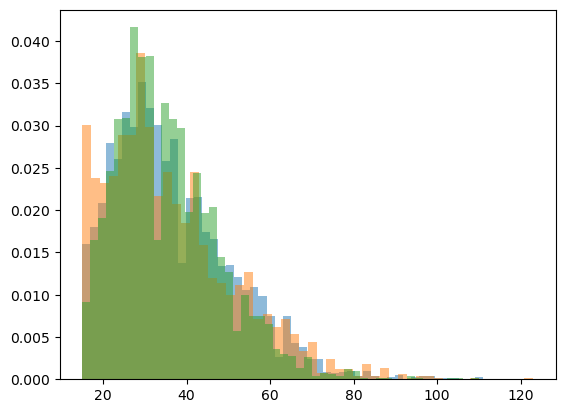

In [44]:
hide = plt.hist(data[data['blitz'] == True]['Length'], bins=50, alpha=0.5, label='blitz', density=True)
hide2 = plt.hist(data[data['classical'] == True]['Length'], bins=50, alpha=0.5, label='blitz', density=True)
hide3 = plt.hist(data[data['bullet'] == True]['Length'], bins=50, alpha=0.5, label='blitz', density=True)


<BarContainer object of 16 artists>

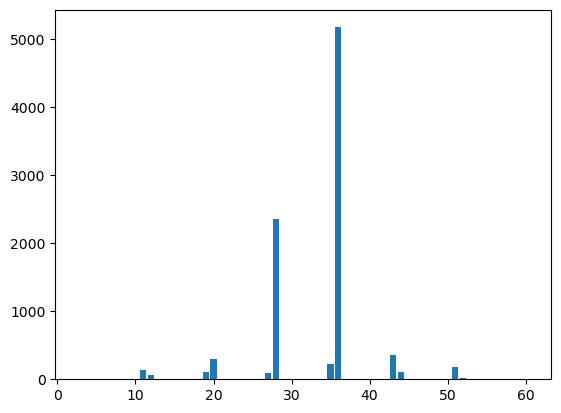

In [48]:
def get_bar_move(move):
    '''Return a histogram of the relative game lengths for a move.'''
    return plt.bar(x = move, height = 'Length', data = data.groupby(move).count().reset_index().sort_values(by='Length', ascending=False))

get_bar_move('sw1')


In [49]:
def get_train_test(data):
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

    #X_train = train_data.drop(columns=['White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'AN', 'Length', 'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 'Opening', 'TimeControl','Termination', 'AN', 'Length', 'moves'])

    #X_test = test_data.drop(columns=['White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'AN', 'Length', 'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 'Opening', 'TimeControl','Termination', 'AN', 'Length', 'moves'])

    #y_train = train_data['Length']

    #y_test = test_data['Length']
    
    X_train = train_data.drop(columns=['White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'AN', 'Length', 'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 'Opening', 'TimeControl','Termination', 'AN', 'Length', 'moves', 'squares', 'pieces', 'captures'])

    X_test = test_data.drop(columns=['White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'AN', 'Length', 'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 'Opening', 'TimeControl','Termination', 'AN', 'Length', 'moves', 'squares', 'pieces', 'captures'])


    y_train = train_data['Result']

    y_test = test_data['Result']
    
    return X_train, X_test, y_train, y_test

In [130]:
from sklearn.ensemble import RandomForestRegressor

def train_test_forest(X_train, X_test, y_train, y_test):
    '''Train a random forest model on the data'''
    rf = HistGradientBoostingClassifier(categorical_features='from_dtype', max_iter=25, max_depth=4, max_leaf_nodes = 20, learning_rate=0.1)
    rf.fit(X_train, y_train)
    preds= rf.predict(X_test)
    #metrics = mean_squared_error(y_test, preds), r2_score(y_test, preds)
    values = y_test.to_numpy().ravel(), preds
    return values, rf
# results = train_test_forest(X_train, X_test, y_train, y_test)
# results

In [51]:
vals = train_test_forest(*get_train_test(data))

In [52]:
pd.Series(vals[0][1]).value_counts()

1-0    960
0-1    867
Name: count, dtype: int64

In [53]:
# data = data.copy()

# for col in data.columns[-10:]:
#     data[col] = data[col].astype('category')

from sklearn.metrics import ConfusionMatrixDisplay


In [115]:
def make_cm(results_df, normalize = False):
    
    '''The resulting confusion matrix has the structure
    
    Pred B [ ] [ ] [ ]
    Pred W [ ] [ ] [ ]
    Pred D [ ] [ ] [ ]
            B   W   D
    '''
    results_df = results_df.copy()
    
    cm = np.zeros((3, 3))
    
    labels = {'0-1': 0, '1-0': 1, '1/2-1/2': 2}
    
    results_df['value'] = (3 * results_df['Predicted'].apply(lambda x: labels[x])) + results_df['Actual'].apply(lambda x: labels[x])
    
    for i in range(9):
        cm[i//3][i%3] = results_df[results_df['value'] == i].shape[0]
        
    if normalize:
        cm = cm/results_df.shape[0]
        
    return cm
        
        
    
    
    
    

Training sight = 10
Training sight = 20
Training sight = 30
Training sight = 40


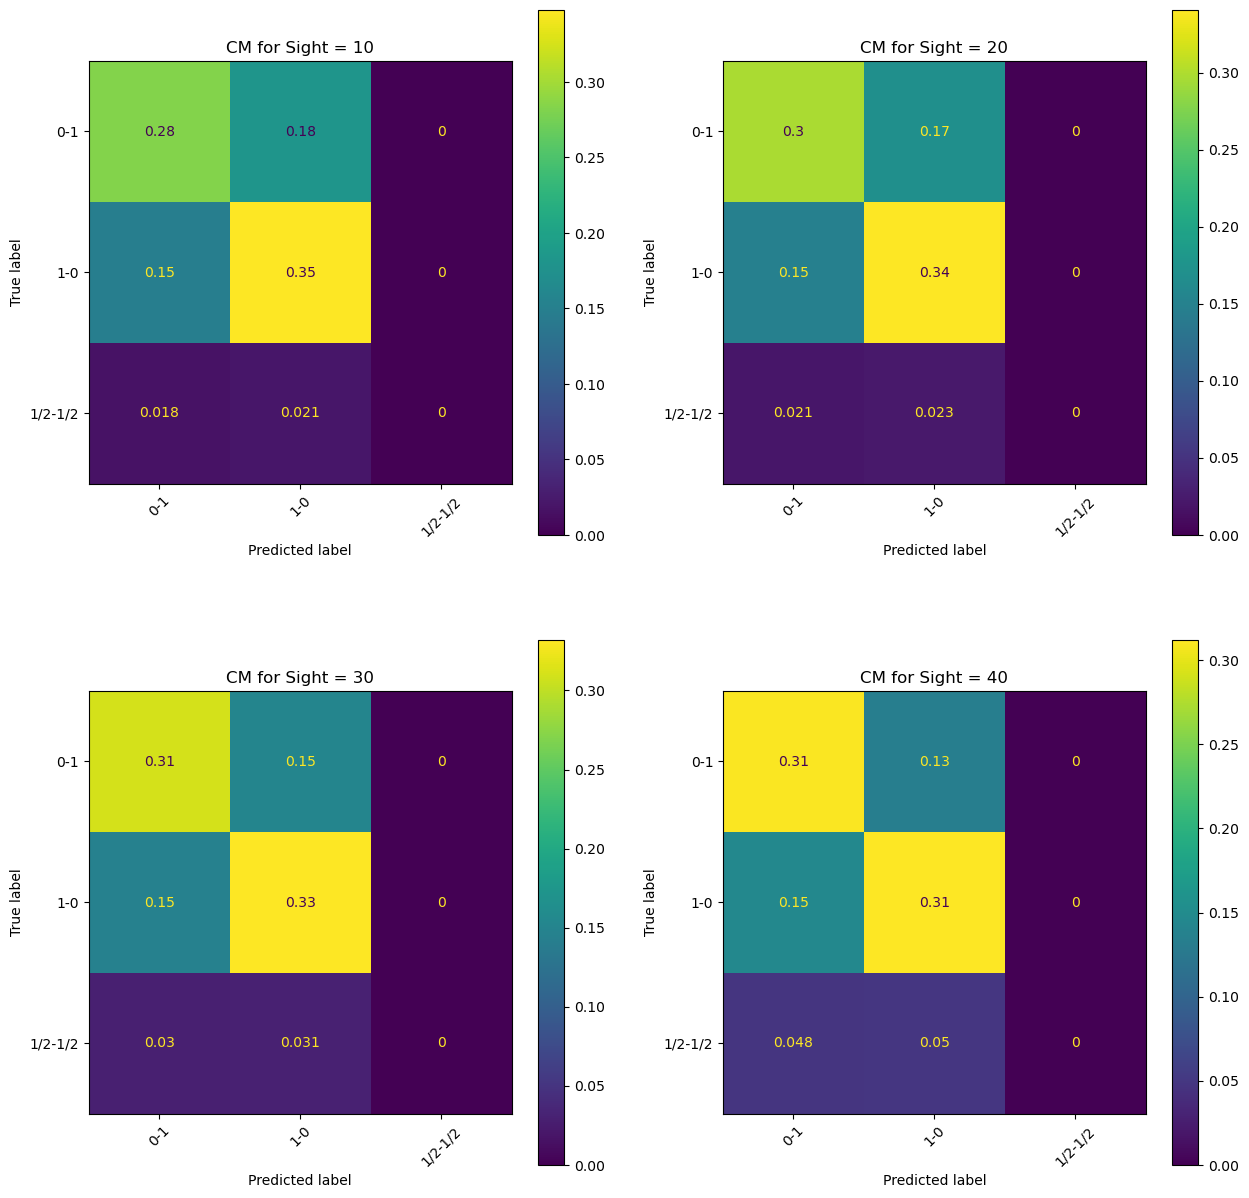

In [133]:

# A model will only work when a test game has AT LEAST as many moves as sight.

sights = [10, 20, 30, 40] #,25, 30]#, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]


fig, ax = plt.subplots(2, 2, figsize = (15, 15))
confs = []
results_dfs = []
models = []

k = 4
for ix, sight in enumerate(sights[:k]):
    print(f"Training sight = {sight}")
    i = ix // 2
    j = ix % 2
    
    labels = ['0-1', '1-0', '1/2-1/2']
    
    data = main(sight, num_rows = int(1e6))
    X_train, X_test, y_train, y_test = get_train_test(data)
    #splits = X_train, X_test, y_train, y_test
    results, model = train_test_forest(X_train, X_test, y_train, y_test) 
    results_df = pd.DataFrame({'Actual': results[0], 'Predicted': results[1]})
    cm = make_cm(results_df, normalize=True).T
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax[i][j], xticks_rotation = 45)
    
    # ax[i][j].hist(acc, bins = 40, density = True, alpha = 1)
    ax[i][j].set_title(f'CM for Sight = {sight}')
    
    confs.append(cm)
    models.append(model)
    results_dfs.append(results_df)
    


In [110]:

# from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import roc_auc_score

# label_dict = {'0-1': 0, '1-0': 1, '1/2-1/2': 2}

# for results_df in results_dfs[0:1]:
#     y_true = results_df['Actual'].value_counts(normalize=True).reset_index()['proportion'].to_numpy()
#     y_true = y_true.reshape(1, y_true.shape[0]).T
    
#     y_score = results_df['Actual'].value_counts(normalize=True).reset_index()['proportion'].to_numpy()
#     y_score = y_score.reshape(1, y_score.shape[0]).T
    
#     macro_roc_auc_ovr = roc_auc_score(
#     y_true,
#     y_score,
#     multi_class="ovr",
#     average="macro",
# )
    
#     #RocCurveDisplay.from_predictions(y_true, y_pred)
# y_true

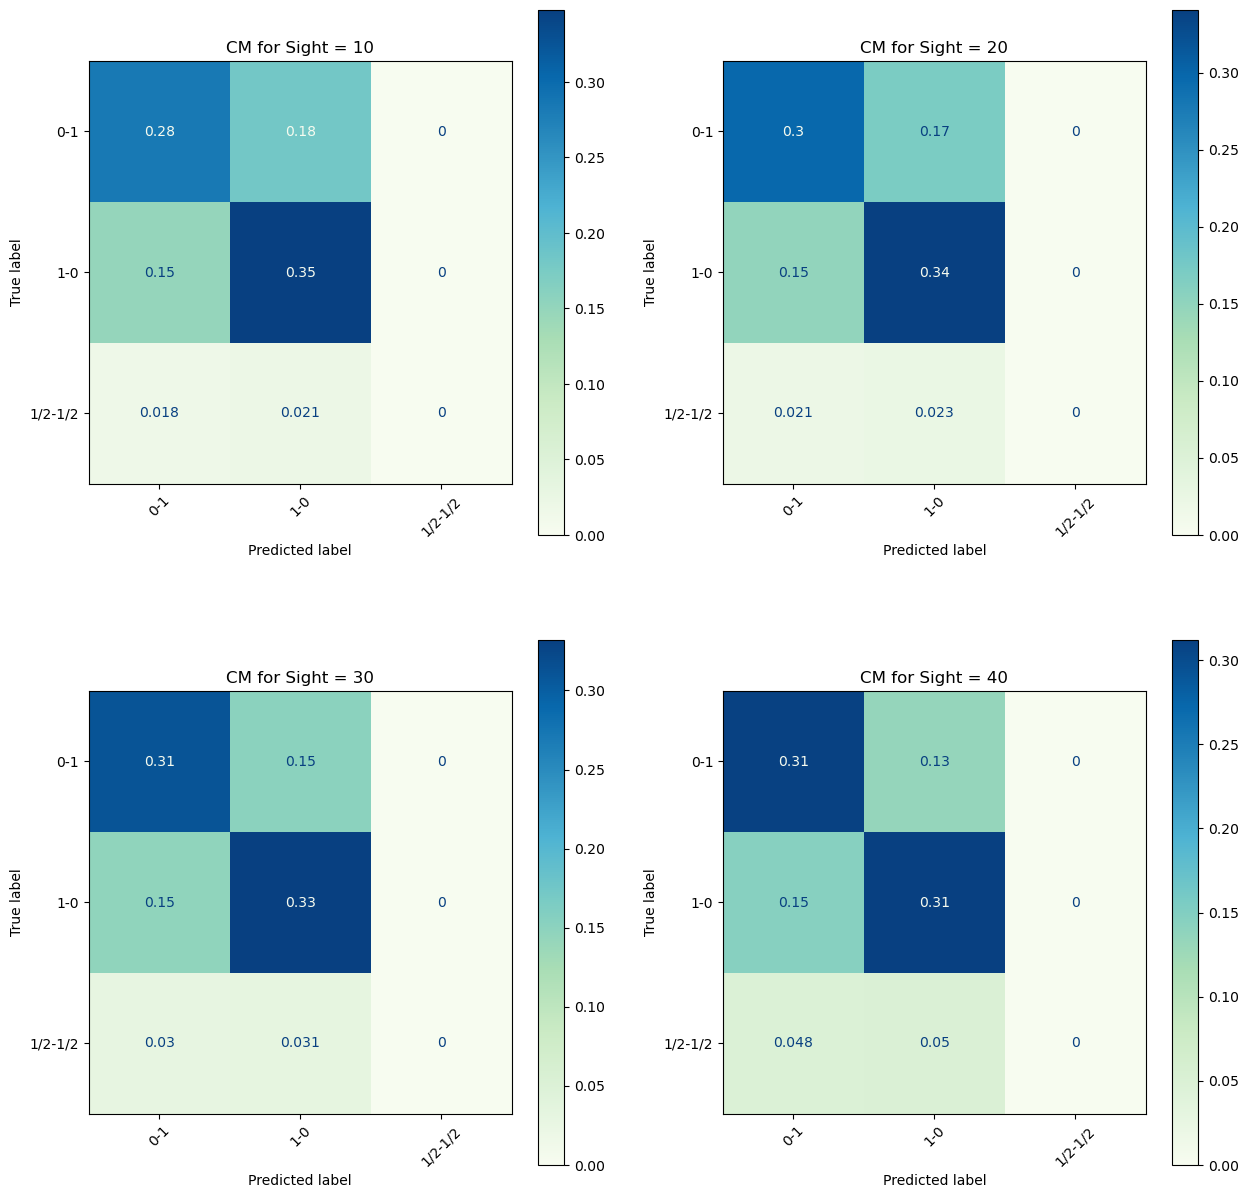

In [142]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))

for ix, conf in enumerate(confs):
    i = ix // 2
    j = ix % 2
    
    labels = ['0-1', '1-0', '1/2-1/2']
    ConfusionMatrixDisplay(conf, display_labels=labels).plot(ax=ax[i][j], xticks_rotation = 45, cmap = 'GnBu')
    
    # ax[i][j].hist(acc, bins = 40, density = True, alpha = 1)
    ax[i][j].set_title(f'CM for Sight = {(ix + 1)* 10}')

In [180]:
results_df['Predicted'].value_counts()

Predicted
1-0    1221
0-1     743
Name: count, dtype: int64

In [ ]:
eda = clean_games(10, num_rows=100000)
popular_strategies = ["King's Indian", "Sicilian", "Ruy Lopez", "Caro-Kann", "Scandinavian"]

# Function for extracting popular strats
def get_cols(col, arr, name, df=eda):
    res = pd.DataFrame()
    for element in arr:
        games_strat = df[df[col].str.contains(element, regex=False)]
        temp = pd.DataFrame({name: [element] * games_strat.shape[0]}, index=games_strat.index)
        games_strat = pd.concat([games_strat, temp], axis=1)
        res = pd.concat([res, games_strat])

    return res

# Plot Results for Popular Strategies
pop = get_cols("Opening", popular_strategies, 'Strat')
w = {}
for strat in popular_strategies:
    w[strat] = eda[eda['Opening'].str.contains(strat, regex=False)].shape[0]

custom = {'1/2-1/2': 'grey', '1-0': 'white', '0-1': 'black'}
sns.histplot(data=pop, x='Strat', hue='Result', multiple='stack', palette=custom)
plt.title('Popular Strategies vs. Result')